## PyMC Geomod 1: Basic concepts 

The goal of this notebook is to show how to use pygeomod to change the position of points in a section in combination with PyMC to use Metropolis to define the mentionated positions

**Importing**

In [5]:
%matplotlib inline
from IPython.core.display import Image

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import shutil
#import geobayes_simple as gs

import pymc as pm # PyMC 2
from pymc.Matplot import plot
from pymc import graph as gr
import numpy as np
#import daft
from IPython.core.pylabtools import figsize
figsize(12.5, 10)

In [19]:
# as we have our model and pygeomod in different paths, let's change the pygeomod path to the default path.
sys.path.append("C:\Users\Miguel\workspace\pygeomod\pygeomod")
#sys.path.append(r'/home/jni/git/tmp/pygeomod_tmp')
import geogrid
import geomodeller_xml_obj as gxml
reload(gxml)
reload(geogrid)

SyntaxError: invalid syntax (geogrid.py, line 156)

## Simplest case: three horizontal layers, with depth unknow
#### Loading pre-made Geomodeller model 

In [4]:
hor_lay = r'..\Geomodeller\Basic_case\3_horizontal_layers\horizontal_layers.xml'
print hor_lay

..\Geomodeller\Basic_case\3_horizontal_layers\horizontal_layers.xml


In [1]:
reload(geogrid)
G1 = geogrid.GeoGrid()

# Using G1, we can read the dimensions of our Murci geomodel
G1.get_dimensions_from_geomodeller_xml_project(hor_lay)

#G1.set_dimensions(dim=(0,23000,0,16000,-8000,1000))
nx = 400
ny = 2
nz = 400
G1.define_regular_grid(nx,ny,nz)

G1.update_from_geomodeller_project(hor_lay)

NameError: name 'geogrid' is not defined

Tha axis here represent the number of cells not the real values of geomodeller

C:\Users\Miguel\Anaconda\lib\site-packages\matplotlib\axes\_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
C:\Users\Miguel\Anaconda\lib\site-packages\matplotlib\axes\_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


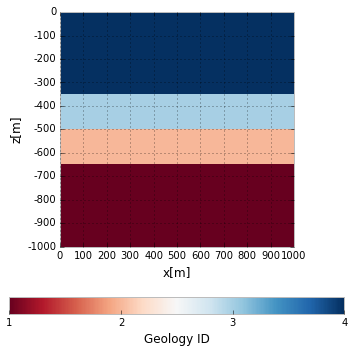

In [6]:
G1.plot_section('y',cell_pos=1,colorbar = True,  cmap='RdBu', figsize=(6,6),interpolation= 'nearest' ,ve = 1, geomod_coord= True)

####Setting Bayes Model

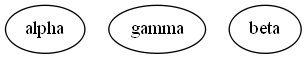

In [7]:
Image("Nice Notebooks\THL_no_thickness.png")

In [8]:
alpha = pm.Normal("alpha", -350, 0.005, value = -200)#, value= 250)
beta = pm.Normal("beta", -500, 0.0001, value = -300)#, value=0)
gamma = pm.Normal("gamma", -650, 0.0001, value = -650)#, value = 0)

#MODEL!!
model = pm.Model([alpha, beta, gamma])

In [9]:
M = pm.MCMC(model)
M.sample(iter=1500, burn = 800)

 [-----------------100%-----------------] 1500 of 1500 complete in 0.1 sec

** Plotting Posteriors**

In [ ]:
plot(M)

** Extracting Posterior Traces to Arrays **

In [11]:
n_samples = 10

alpha_samples, alpha_samples_all = M.trace('alpha')[-n_samples:], M.trace("alpha")[:]
beta_samples, beta_samples_all = M.trace('beta')[-n_samples:], M.trace("beta")[:]
gamma_samples, gamma_samples_all = M.trace('gamma')[-n_samples:], M.trace('gamma')[:]

samples = zip (alpha_samples,beta_samples, gamma_samples,alpha_samples,beta_samples, gamma_samples)

## Generating new model in Geomodeller

Setting the new folder where we want to work

In [12]:
try:
    shutil.copytree('C:/Users/Miguel/workspace/Thesis/Geomodeller/Basic_case/3_horizontal_layers', 'Temp/')
except:
    print "The folder is already created"
#r'..\Geomodeller\Basic_case\3_horizontal_layers\

The folder is already created


Loading GeoModeller project where we want to apply Bayes Inferences (As in first part of the notebook):

In [13]:
reload(gxml)
gmod_obj = gxml.GeomodellerClass()
gmod_obj.load_geomodeller_file(hor_lay)
gmod_obj.write_xml("backup\orihor_lay.xml")

Showing pygeomod functions to extract data from the GeoModeller Project

In [14]:
# Section names:
section_names = gmod_obj.get_section_names()
print "section names",section_names, "\n" 

# Choose the section we want to use with Positon
sections = gmod_obj.get_sections()[0]
print "Chosen section by position", sections, "\n"

# Create a dictionary so we can acces the section through the name
section_dict = gmod_obj.create_sections_dict()
print "Chosen section by entry", section_dict['Section1'], "\n"

# Formation names
formation_names = gmod_obj.get_formation_names()
print "formation names", formation_names, "\n"

# Get the points of all formation for a given section: Position
contact_points = gmod_obj.get_formation_point_data(sections) #to extract points you have to choose one of the sections
print "Contact points on the chosen section", contact_points, "\n", type(contact_points)

## Get the points of all formation for a given section: Dictionary
contact_points = gmod_obj.get_formation_point_data(section_dict['Section1']) #to extract points you have to choose one of the sections
print "Contact points on the chosen section", contact_points, "\n", type(contact_points)

# Showing contact points
points = gmod_obj.get_point_coordinates(contact_points)
print "Points coordinates", points

section names ['Section1', 'SurfaceTopography'] 

Chosen section by position <Element '{http://www.geomodeller.com/geo}Section' at 0x2e31f390> 

Chosen section by entry <Element '{http://www.geomodeller.com/geo}Section' at 0x2e31f390> 

formation names ['Form1', 'Form2', 'Form3'] 

Contact points on the chosen section [<Element '{http://www.geomodeller.com/geo}Interface' at 0x2e31f940>, <Element '{http://www.geomodeller.com/geo}Interface' at 0x2e31fa90>, <Element '{http://www.geomodeller.com/geo}Interface' at 0x2e31fbe0>, <Element '{http://www.geomodeller.com/geo}Interface' at 0x2e31fd30>, <Element '{http://www.geomodeller.com/geo}Interface' at 0x2e31fe80>, <Element '{http://www.geomodeller.com/geo}Interface' at 0x2e31ffd0>] 
<type 'list'>
Contact points on the chosen section [<Element '{http://www.geomodeller.com/geo}Interface' at 0x2e31f940>, <Element '{http://www.geomodeller.com/geo}Interface' at 0x2e31fa90>, <Element '{http://www.geomodeller.com/geo}Interface' at 0x2e31fbe0>, <Elem

** Changing point position values and creating new xml projects **

We want to change all points of the three formations. To do so we use the Section 1 that is what we are plotting

(-336.76603718274771,
 -332.88033393639932,
 -749.09585711070451,
 -336.76603718274771,
 -332.88033393639932,
 -749.09585711070451)

In [24]:
for j in range(n_samples):
    for i, point in enumerate(contact_points):
        gmod_obj.change_formation_point_pos(point, y_coord = [samples[j][i],samples[j][i]])
    gmod_obj.write_xml("Temp/test"+ str(j)+".xml")

Now we can see the position of the points has changed (in this case just the last iteration, i.e. last value of our Metropolis chain)

In [25]:
# Showing contact points
points_changed = gmod_obj.get_point_coordinates(contact_points)
print "Points coordinates", points_changed


Points coordinates ['Form3 50.000000,-356.191320 150.000000,-356.191320 ', 'Form2 50.000000,-616.210664 150.000000,-616.210664 ', 'Form1 50.000000,-572.489090 150.000000,-572.489090 ', 'Form3 850.000000,-356.191320 950.000000,-356.191320 ', 'Form2 850.000000,-616.210664 950.000000,-616.210664 ', 'Form1 850.000000,-572.489090 950.000000,-572.489090 ']


** Plotting the results ** 

c_char_p('Temp/test0.xml')
c_char_p('Temp/test1.xml')
c_char_p('Temp/test2.xml')
c_char_p('Temp/test3.xml')
c_char_p('Temp/test4.xml')
c_char_p('Temp/test5.xml')
c_char_p('Temp/test6.xml')
c_char_p('Temp/test7.xml')
c_char_p('Temp/test8.xml')
c_char_p('Temp/test9.xml')


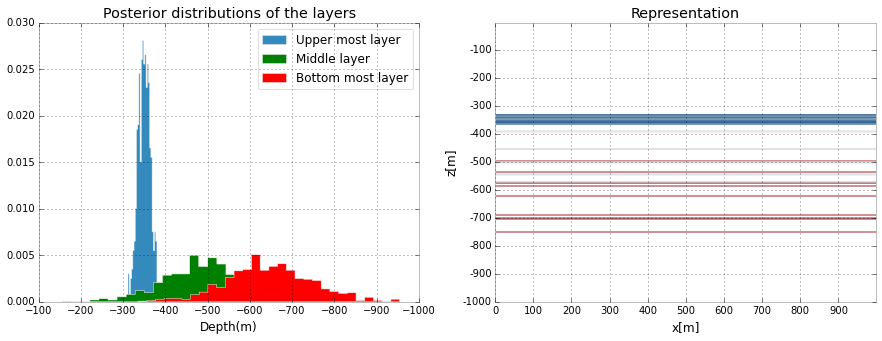

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(alpha_samples_all, histtype='stepfilled', bins=30, alpha=1,
         label="Upper most layer", normed=True)
ax[0].hist(beta_samples_all, histtype='stepfilled', bins=30, alpha=1,
         label="Middle layer", normed=True, color = "g")
ax[0].hist(gamma_samples_all, histtype='stepfilled', bins=30, alpha=1,
         label="Bottom most layer", normed=True, color = "r")


ax[0].invert_xaxis()
ax[0].legend()
ax[0].set_title(r"""Posterior distributions of the layers""")
ax[0].set_xlabel("Depth(m)")


ax[1].set_title("Representation")


for j in range(n_samples):
    hor_lay_new = 'Temp/test'+str(j)+'.xml'
    
    # Read the new xml
    #hor_lay_new = 'Temp_test/new.xml'
    G1 = geogrid.GeoGrid()
    
    # Getting dimensions and definning grid
    
    G1.get_dimensions_from_geomodeller_xml_project(hor_lay_new)
    nx = 400
    ny = 2
    nz = 400
    G1.define_regular_grid(nx,ny,nz)
    
    # Updating project
    G1.update_from_geomodeller_project(hor_lay_new)
    
    # Printing new model
    G1.plot_section('y',cell_pos=1,colorbar = True, ax = ax[1], alpha = 0.3,  cmap='RdBu', figsize=(6,6),interpolation= 'nearest' ,ve = 1, geomod_coord= True, contour = True)
  